# Preprocessing and training

In this notebook we will create a model for loan eligibility. It will provide some simple preprocessing teqniques and a simple model.

Let's start!

## Import data

Let's import the data we will work with and have a quick look. 

- For simplicity reasons we will not go through data visualisations in this tutorial.
- The data lives in a CSV in this phase for simplicity reasons.
- The data laoded at this point is what we usually refer to as the dataset

In [41]:
import pandas as pd

data = pd.read_csv("./Loan_Data.csv")

data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Lets look at some meta data of our dataset.

- We have 13 collumns to work with
- Some of the collumns contain empty values

In [42]:
print("Collumns:", data.columns, "\n")
print(data.isna().any(), "\n")

Collumns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool 



Lets remove rows with empty values:

In [43]:
print("Shape before droping N/A:", data.shape, "\n")
data = data.dropna()
print("Shape after droping N/A:", data.shape)


Shape before droping N/A: (614, 13) 

Shape after droping N/A: (480, 13)


## Label encoding

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. 
These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [44]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_columns = ['Gender','Married','Education','Self_Employed','Loan_Status']

for label_column in label_columns:
    data[label_column] = label_encoder.fit_transform(data[label_column])

data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,Urban,1


## One Hot Encoding

Most Machine Learning algorithms cannot work with categorical data and needs to be converted into numerical data. Sometimes in datasets, we encounter columns that contain categorical features (string values) for example parameter Gender will have categorical parameters like Male, Female. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.

One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example Property Area mapped to 0, 1, 2. But this can add bias in our model as it will start giving higher preference to the one parameter as 2>1>0 and ideally both labels are equally important in the dataset. To deal with this issue we will use One Hot Encoding technique.



In [45]:
categorical_columns = ['Dependents','Property_Area']

for column in categorical_columns:
  dummies = pd.get_dummies(data[[f"{column}"]], columns=[column], prefix=[f"{column}_"], drop_first=True)
  data = data.join(dummies)

data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents__1,Dependents__2,Dependents__3+,Property_Area__Semiurban,Property_Area__Urban
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,0,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1,0,1,0,0,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,Urban,1,0,0,0,0,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,0,1,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,Urban,1,0,1,0,0,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0,1,0,0,1,0
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,Urban,1,0,1,0,0,1


## Train the model

Now the time comes to train the model! Although people view this part as the sexy part, it is usually the most straightforward one. First clean the collumns that provide no real info and fit the model to the data. We will be using XGBoost for this example.

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [46]:
import numpy as np

data = data.drop(['Loan_ID', 'Property_Area', 'Dependents'],axis=1)
data = data.astype(np.float64)
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents__1,Dependents__2,Dependents__3+,Property_Area__Semiurban,Property_Area__Urban
1,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5,1.0,1.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Before feeding all this data to the model we need to split it in training and test datasets

- Training Dataset: The sample of data used to fit the model. The model sees and learns from this data.
- Test Dataset: The sample of data used to provide an evaluation of a final model fit on the training dataset.

In [47]:
import xgboost
from sklearn.model_selection import train_test_split

model = xgboost.XGBClassifier()
X = data.drop(['Loan_Status'],axis=1).to_numpy()
y = data['Loan_Status'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train).score(X_test, y_test)

0.7361111111111112

And there is is! The model is trained and the number above is the accuracy the model had on the test set. But how do we use this model?

In [48]:
data_to_predict = X_test[0:1]
predict_proba_result = model.predict_proba(data_to_predict)
predict_result = model.predict(data_to_predict)
print("predict_proba_result: \n", predict_proba_result, "\n")
print("predict_result: ", predict_result)

# enc.inverse_transform(pred)

predict_proba_result: 
 [[0.00906378 0.9909362 ]] 

predict_result:  [1]


Now all we have to do is save the model for future use.

In [49]:
model.save_model("model.json")

## Feature importance

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


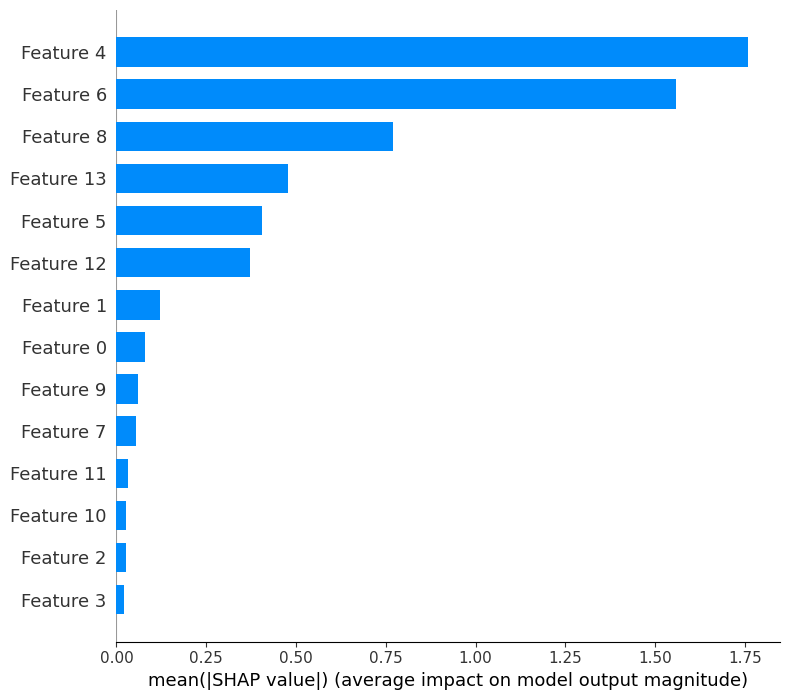

In [50]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_to_predict)
np.abs(shap_values.sum(1) + explainer.expected_value - predict_result).max()
shap.summary_plot(shap_values, data_to_predict, plot_type="bar")
